# Homework 1:

Generate a set of 𝑁 points of the function $sin^2(𝑥)$ between $0$ and $2 \pi$, including an array of 𝑥 positions, 𝑦=𝑓(𝑥) and first derivative 𝑦′=𝑓′(𝑥)

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

## Instructions:
Below you will find some examples but try not to use the infamous copy and paste method.
Use those as a reference. (Except the hermite polynomial routine (hdiff, hermite) which you can copy and paste)

### Useful examples:
use as a reference, $\color{red}{\text{DO NOT COPY & PASTE}}$ (except a Hermite function - below)

#### Interpolation using interp1d

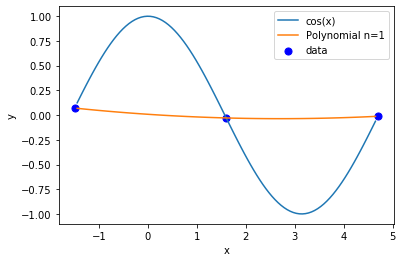

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.array([-1.5, 1.6, 4.7])
y = np.array([0.071,-0.029,-0.012])
yprime=np.array([1,-1,1])

# Linear polynomial n=1
poly1=interp1d(x,y,kind='quadratic') # kind='quadratic'

#xdata=np.linspace(-1.5,4.7,101)
xdata = np.linspace(-np.pi/2.0, 3*np.pi/2.0, 101, endpoint=False)[2:]
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='blue',s=50,label='data')
ax.plot(xdata,np.cos(xdata),label='cos(x)')
ax.plot(xdata,poly1(xdata),label='Polynomial n=1')
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.legend()

#### Interpolation using Lagrange Polynomial

In [2]:
from scipy.interpolate import lagrange
L=lagrange(x,y)

#### Interpolation using Hermite Polynomial

In [3]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    

Hinterp = hermite(x, y, yprime, xdata)

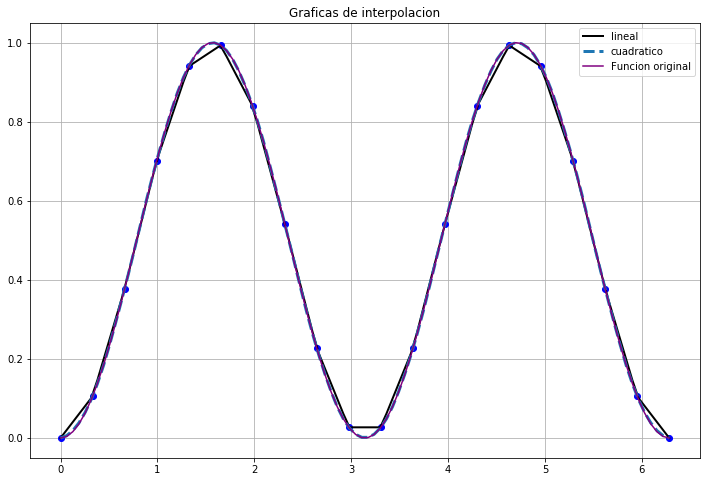

In [4]:
# Realizacion de nuestro ejercicio:
import numpy as np
import scipy as sp
from scipy import interpolate 
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt



N=100

x=np.linspace(0, 2*np.pi,20)  # Generamos nuestro intervalo
y=(np.sin(x))**2 # evaluamos los puntos en nuestra funcion
z=np.linspace(0, 2*np.pi, N)  # Generamos un intervalo con mas puntos.
k=(np.sin(z))**2  # Evaluamos los puntos de nuestra funcion.
f=interpolate.interp1d( x,y,kind='linear' )  # Generamos la interpolacion lineal.



plt.figure( figsize=(12,8) )  # Creamos una figura.
plt.plot(x,f(x),'bo')  # Dibumos nuesta funcion seno al cuadrado.

# Ahora dibujemos la grafica de la interpolacion lineal. para esto, tenemos los siguientes:
f1=interpolate.interp1d( x,y,kind='quadratic' ) # Interpolamos ahora de una manera cuadratica.
z=np.linspace(0, 2*np.pi, N) # Generamos un intervalo
z1=np.linspace(0, 2*np.pi, N) # Generamos otro intervalo
plt.plot(z,f(z),'k-',linewidth=2,label="lineal")  # Funcion original
plt.plot(z1,f1(z1),"--",lw=3,label="cuadratico") # Graficamos la parte cuadratica.
plt.plot(z,k,color="purple",label="Funcion original") 
 # we have our real fuction, In this case it is sin**2(x)
plt.grid()
plt.title("Graficas de interpolacion")
plt.legend()
plt.show()











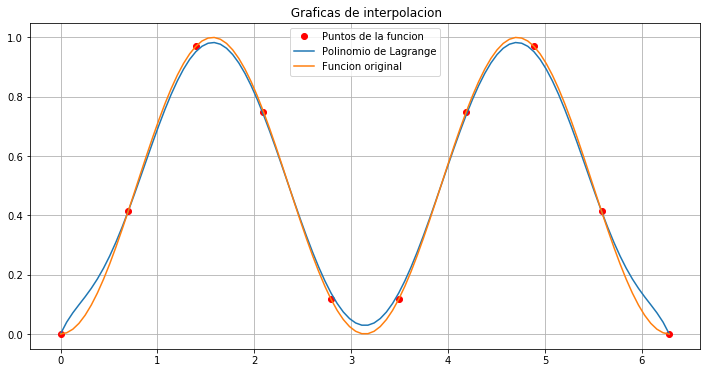

In [5]:
# Veamoslo con el metodo de lagrange:
x1=np.linspace(0, 2*np.pi,10)   # Generamos un conjunto de puntos
y1=(np.sin(x1))**2  # Evaluamos nuestra funcion en los x1.
x2= np.linspace(0, 2*np.pi,100)  # Generamos un conjunto de puntos mas estrechos.
y2=(np.sin(x2))**2  # Evaluamos los puntos de x2.
P2=interpolate.lagrange(x1,f(x1))   # Realizamos la interpolacion de lagrange.
plt.figure(figsize=(12,6))   # Creamos una difura.
plt.plot(x1,y1,'ro',label="Puntos de la funcion") # Dibujamos los puntos de nuestra funcion original
plt.plot(x2,P2(x2),label='Polinomio de Lagrange')  # Graficamos el polinomio.
plt.plot(x2,y2,label="Funcion original")  #  Graficamos nuestra funcion original. 
plt.grid()   
plt.legend()
plt.title(" Graficas de interpolacion")
plt.show()




[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


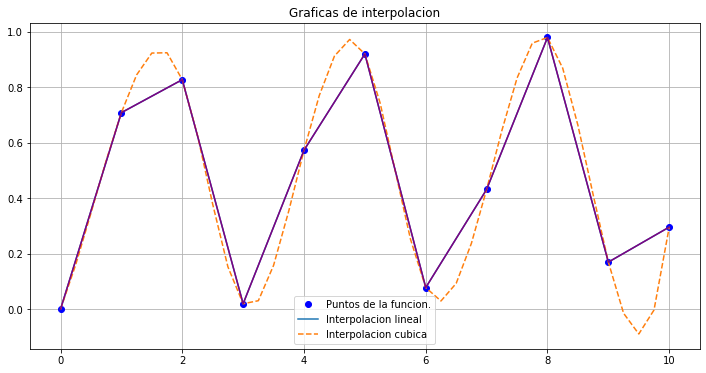

In [6]:
from scipy.interpolate import interp1d    # Metodo spline....  # Importamos la libreria.
x=np.linspace(0, 10, num=11, endpoint=True)  # Definimos un intervalo en este caso de 0 a 10 con 11 valores.
print(x)  # Visualizamos nuestro arreglo.
y=(np.sin(x))**2  # Tenemos nuestra funcion sin**2(x)
f = interp1d(x, y)   #  Interpolamos los puntos.
f2 = interp1d(x, y, kind='cubic')  # Realizamos una interpolacion cubica. La interpolacion cubica es mas suave que la cuadratica.
abcsisa = np.linspace(0, 10, num=41, endpoint=True)  # Generamos el conjunyo de puntos hasta el 10 en 41 tramos
plt.figure(figsize=(12,6))  # Creamos la figura.
plt.plot(x, y, 'bo',label="Puntos de la funcion.") # Dibujamos la grafica de los puntos
plt.plot(abcsisa,f(abcsisa),'-',label="Interpolacion lineal")  # Interpolacion lineal
plt.plot(abcsisa,f2(abcsisa),'--',label='Interpolacion cubica') # Interpolacion cubica.
plt.plot(x,y,color="Purple")
plt.legend()
plt.title("Graficas de interpolacion")
plt.grid()           # Creamos la figura.
plt.show()


Text(0.5, 1.0, 'Grafica de interpolacion')

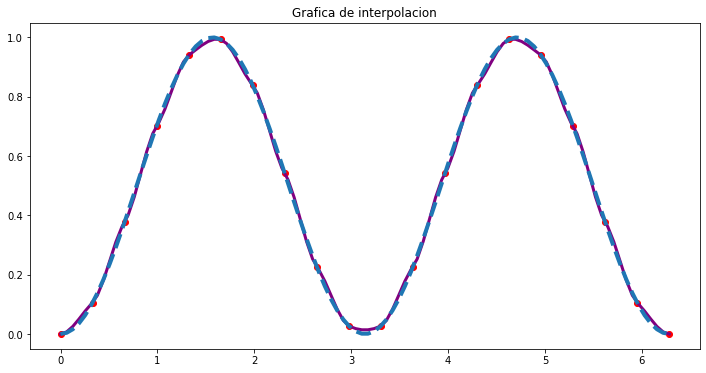

In [7]:
from scipy.interpolate import CubicHermiteSpline 
N=100
x=np.linspace(0, 2*np.pi,20)  
x3= np.linspace(0, 2*np.pi,N) 
y=(np.sin(x))**2
y3=(np.sin(x3))**2
derivada=np.sin(x)*np.cos(x)
hermite=CubicHermiteSpline(x,y,derivada)
plt.figure(figsize=(12,6))
plt.plot(x,y,"ro",label="Puntos de la funcion original.")  # Generamos una interpolacion cubica de punto por punto.
plt.plot(x3,hermite(x3),linewidth=3,color="purple",label="polinomio hermite-cubico")
plt.plot(x3,y3,'--',label="funcion original",lw=4.0)
plt.title("Grafica de interpolacion")



Se puede observar que la interpolacion Hermite-spline es mas precisa que la interpolacion de lagrange, pues se conectan mucho mejor los puntos no dejando espacios como si lo hace lagrange.

/usr/lib64/python3.7/site-packages/numpy/polynomial/hermite.py:1391: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


Text(0.5, 1.0, 'Graficas de interpolacion')

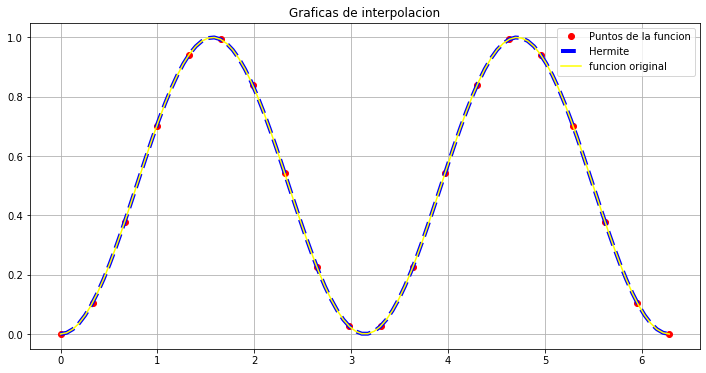

In [8]:
H=np.polynomial.hermite.Hermite.fit(x,y,19)
plt.figure(figsize=(12,6))
plt.plot(x,y,"ro",label="Puntos de la funcion")
plt.plot(x3,H(x3),'--',color="Blue",lw=4,label="Hermite")
plt.plot(x3,y3,color="yellow",label="funcion original")
plt.grid()
plt.legend()
plt.title("Graficas de interpolacion")
# Es mejor hermite polinomio es mas exacto que lagrange a la hora de tener las curvas.